# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [217]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [218]:
# Tampilkan 10 baris pertama dengan function head.
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [219]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [220]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [221]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [222]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [223]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [224]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [225]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [226]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
numerical_cols = df.select_dtypes(include=['number']).columns

#minmax
scaler = MinMaxScaler()

scaled_df = df.copy()
scaled_df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
scaled_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [227]:
# Melakukan drop pada kolom yang memiliki keterangan id
columns_id = ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address']
scaled_df.drop(columns=columns_id)
scaled_df = scaled_df.drop(columns=columns_id)
scaled_df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [228]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
# inisiasi encoder
label_encoder = LabelEncoder()

# memilih fitur objektif
categorical_cols = scaled_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
  scaled_df[col] = label_encoder.fit_transform(scaled_df[col])

scaled_df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [229]:
scaled_df = scaled_df.dropna()

In [230]:
scaled_df = scaled_df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [231]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [232]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [233]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
scaled_df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,0.154922,1256.404921,0.788574,21.383653,1.013344,0.429323,1.532110,0.377521,0.030025,0.335330,180.984987
std,0.151893,726.716182,0.437979,12.417622,0.831075,0.287681,1.153802,0.242365,0.147059,0.262236,103.757245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042624,626.250000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093288,92.000000
50%,0.110829,1254.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.308010,181.000000
75%,0.214235,1884.750000,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.507822,271.750000
max,1.000000,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000


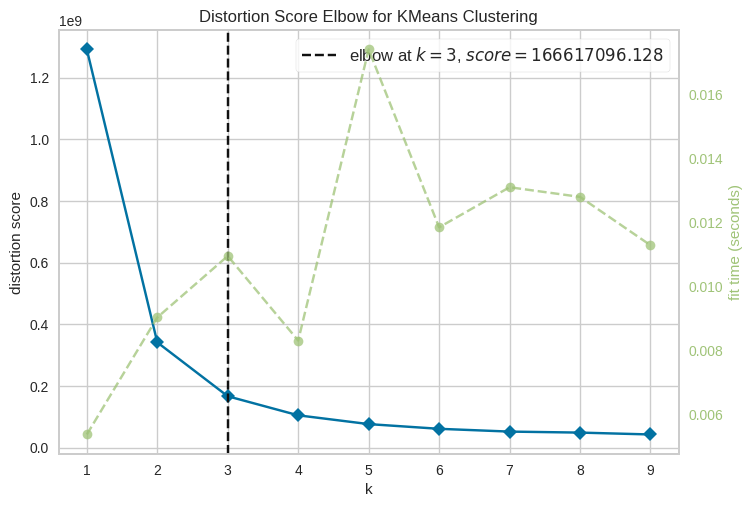

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [234]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(scaled_df)
visualizer.show()

In [235]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(scaled_df)

scaled_df["Target"] = kmeans.labels_

In [236]:
scaled_df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,1
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,2
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,2
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,1
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,1


Jalankan cell code ini untuk menyimpan model kamu.

In [237]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [238]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [239]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [240]:
# Membangun model menggunakan PCA.

In [241]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [242]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

grouped = scaled_df.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max'])

grouped

TransactionAmount                     CustomerAge            \
                    mean       min       max        mean  min  max   
Target                                                               
0               0.159254  0.000000  0.954092    0.428094  0.0  1.0   
1               0.149987  0.000313  0.953561    0.412540  0.0  1.0   
2               0.155522  0.000031  1.000000    0.447404  0.0  1.0   

       TransactionDuration                LoginAttempts            \
                      mean  min       max          mean  min  max   
Target                                                              
0                 0.382203  0.0  1.000000      0.031523  0.0  1.0   
1                 0.368306  0.0  0.996552      0.036250  0.0  1.0   
2                 0.382066  0.0  0.996552      0.022271  0.0  1.0   

       AccountBalance                      
                 mean       min       max  
Target                                     
0            0.344354  0.000000  1.000000  
1            0.333257  0.000064  0.997633  
2            0.328340  0.001125  0.997144

In [243]:
grouped_transpose = grouped.T
grouped_transpose

Target                           0         1         2
TransactionAmount   mean  0.159254  0.149987  0.155522
                    min   0.000000  0.000313  0.000031
                    max   0.954092  0.953561  1.000000
CustomerAge         mean  0.428094  0.412540  0.447404
                    min   0.000000  0.000000  0.000000
                    max   1.000000  1.000000  1.000000
TransactionDuration mean  0.382203  0.368306  0.382066
                    min   0.000000  0.000000  0.000000
                    max   1.000000  0.996552  0.996552
LoginAttempts       mean  0.031523  0.036250  0.022271
                    min   0.000000  0.000000  0.000000
                    max   1.000000  1.000000  1.000000
AccountBalance      mean  0.344354  0.333257  0.328340
                    min   0.000000  0.000064  0.001125
                    max   1.000000  0.997633  0.997144

In [244]:
categorical_columns = scaled_df.drop(columns=numerical_cols)

mode_values = categorical_columns.groupby('Target').agg(lambda x: x.mode()[0])

print(mode_values)

        TransactionDate  TransactionType  Location  Channel  \
Target                                                        
0                  2485                1        11        1   
1                     0                1         5        1   
2                   837                1        22        1   

        CustomerOccupation  PreviousTransactionDate  
Target                                               
0                        3                      360  
1                        3                      240  
2                        2                       69  


## **Menjelaskan Karakteristik Tiap Cluster Berdasarkan Rentangnya**

### **1. Cluster 0**
- **Rata-rata Transaction Amount:** 0.159254  
- **Minimum Transaction Amount:** 0.000000  
- **Maksimum Transaction Amount:** 0.954092  

- **Rata-rata Customer Age:** 0.428094  
- **Minimum Customer Age:** 0.000000  
- **Maksimum Customer Age:** 1.000000  

- **Rata-rata Transaction Duration:** 0.382203  
- **Minimum Transaction Duration:** 0.000000  
- **Maksimum Transaction Duration:** 1.000000  

- **Rata-rata Login Attempts:** 0.031523  
- **Minimum Login Attempts:** 0.000000  
- **Maksimum Login Attempts:** 1.000000  

- **Rata-rata Account Balance:** 0.344354  
- **Minimum Account Balance:** 0.000000  
- **Maksimum Account Balance:** 1.000000  

- **Mode Transaction Date:** 2485  
- **Mode Transaction Type:** 1  
- **Mode Location:** 11  
- **Mode Channel:** 1  
- **Mode Customer Occupation:** 3  
- **Mode Previous Transaction Date:** 360  

**Analisis:**  
Cluster ini mencerminkan pengguna yang aktif dengan rata-rata saldo tertinggi dan usia pelanggan paling tua di antara cluster lain. Channel yang digunakan adalah digital (1), dan lokasi serta waktu transaksi menunjukkan pola perilaku rutin. Transaksi dilakukan oleh pelanggan yang cenderung sudah lama menggunakan layanan.


### **2. Cluster 1**
- **Rata-rata Transaction Amount:** 0.149987  
- **Minimum Transaction Amount:** 0.000313  
- **Maksimum Transaction Amount:** 0.953561  

- **Rata-rata Customer Age:** 0.412540  
- **Minimum Customer Age:** 0.000000  
- **Maksimum Customer Age:** 1.000000  

- **Rata-rata Transaction Duration:** 0.368306  
- **Minimum Transaction Duration:** 0.000000  
- **Maksimum Transaction Duration:** 0.996552  

- **Rata-rata Login Attempts:** 0.036250  
- **Minimum Login Attempts:** 0.000000  
- **Maksimum Login Attempts:** 1.000000  

- **Rata-rata Account Balance:** 0.333257  
- **Minimum Account Balance:** 0.000064  
- **Maksimum Account Balance:** 0.997633  

- **Mode Transaction Date:** 0  
- **Mode Transaction Type:** 1  
- **Mode Location:** 5  
- **Mode Channel:** 1  
- **Mode Customer Occupation:** 3  
- **Mode Previous Transaction Date:** 240  

**Analisis:**  
Cluster ini menggambarkan pengguna baru atau kurang aktif, dengan mode tanggal transaksi di awal (0), dan aktivitas login yang relatif tinggi. Meskipun menggunakan channel digital, mereka belum memiliki saldo atau durasi transaksi yang besar, kemungkinan mencerminkan pengguna yang masih dalam tahap eksplorasi.


### **3. Cluster 2**
- **Rata-rata Transaction Amount:** 0.155522  
- **Minimum Transaction Amount:** 0.000031  
- **Maksimum Transaction Amount:** 1.000000  

- **Rata-rata Customer Age:** 0.447404  
- **Minimum Customer Age:** 0.000000  
- **Maksimum Customer Age:** 1.000000  

- **Rata-rata Transaction Duration:** 0.382066  
- **Minimum Transaction Duration:** 0.000000  
- **Maksimum Transaction Duration:** 0.996552  

- **Rata-rata Login Attempts:** 0.022271  
- **Minimum Login Attempts:** 0.000000  
- **Maksimum Login Attempts:** 1.000000  

- **Rata-rata Account Balance:** 0.328340  
- **Minimum Account Balance:** 0.001125  
- **Maksimum Account Balance:** 0.997144  

- **Mode Transaction Date:** 837  
- **Mode Transaction Type:** 1  
- **Mode Location:** 22  
- **Mode Channel:** 1  
- **Mode Customer Occupation:** 2  
- **Mode Previous Transaction Date:** 69  

**Analisis:**  
Cluster ini terdiri dari pengguna yang lebih dewasa, memiliki durasi dan jumlah transaksi mendekati cluster 0, namun frekuensi login rendah. Hal ini bisa menunjukkan pengguna loyal dengan aktivitas konsisten namun tidak terlalu sering melakukan login (mungkin pengguna mobile app). Mode tanggal transaksi menunjukkan aktivitas yang stabil namun tidak seintens cluster 0.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [245]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [246]:
# Simpan Data
scaled_df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [247]:
# inverse dataset ke rentang normal

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [248]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [249]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)